# Filters TEST

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Loading Data

In [2]:
nyx = pd.read_csv("Data/telemetrico_nyx.csv")
trix = pd.read_csv("Data/telemetrico_trix.csv")
pacifico = pd.read_csv("Data/telemetrico_pacifico.csv")

In [3]:
pressure_nyx = nyx["pressure"]
pressure_trix = trix["Pressure"]
pressure_pacifico = pacifico["pressure"]
pressure_list = [pressure_nyx, pressure_trix, pressure_pacifico]

# Filters

# Recursive Average Filter

In [4]:
def recursive_average_filter(k, x_real, x_prev):
    x_prox = x_prev*((k-1)/k) + 1/k * x_real
    return x_prox

In [5]:
count = 0
for pressure in pressure_list:
    new_pressure = []
    for i in range(len(pressure)):
        x_real = pressure[i]
        if i == 0:
            x_prev = x_real
        else:
            x_prev = x_prox
        x_prox = recursive_average_filter(i+1, x_real, x_prev)
        new_pressure.append(float(x_prox))
    if count == 0:
        new_pressure_nyx = new_pressure
    elif count == 1:
        new_pressure_trix = new_pressure
    elif count == 2:
        new_pressure_pacifico = new_pressure
    count += 1

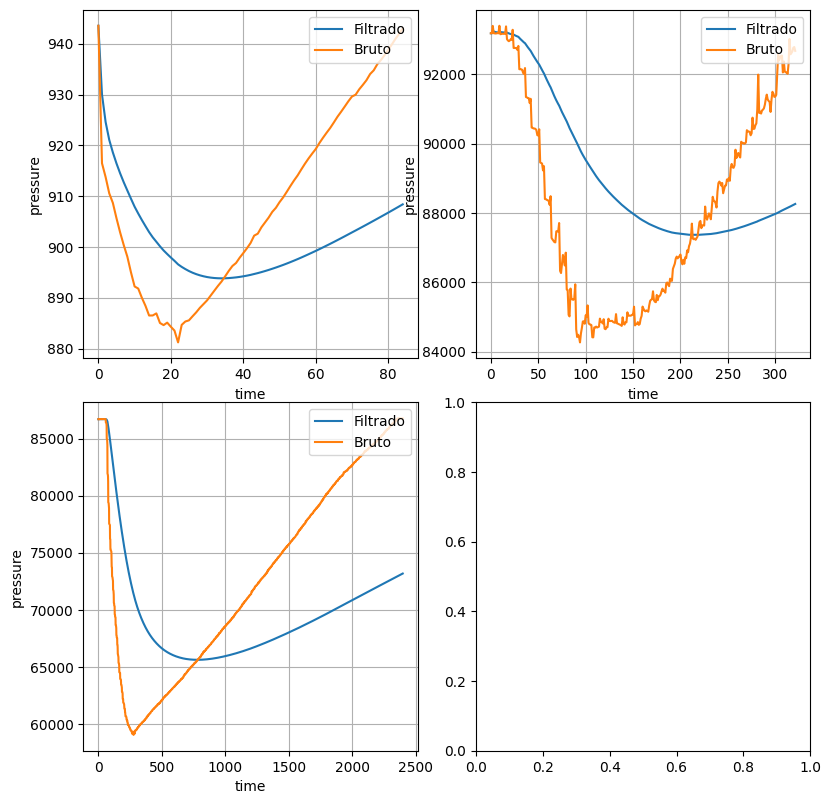

In [6]:
figure, axis = plt.subplots(2, 2, figsize=(8, 8)) 
figure.tight_layout()

# Nyx
y_normal_nyx = pressure_nyx
y_filtrado_nyx = new_pressure_nyx
x_nyx = [x for x in range(len(y_filtrado_nyx))]

axis[0, 0].plot(x_nyx, y_filtrado_nyx, label="Filtrado")
axis[0, 0].plot(x_nyx, y_normal_nyx, label="Bruto")
axis[0, 0].set_xlabel("time")
axis[0, 0].set_ylabel("pressure")
axis[0, 0].legend(loc="upper right")
axis[0, 0].grid()

# Trix
y_normal_trix = pressure_trix
y_filtrado_trix = new_pressure_trix
x_trix = [x for x in range(len(y_filtrado_trix))]

axis[0, 1].plot(x_trix, y_filtrado_trix, label="Filtrado")
axis[0, 1].plot(x_trix, y_normal_trix, label="Bruto")
axis[0, 1].set_xlabel("time")
axis[0, 1].set_ylabel("pressure")
axis[0, 1].legend(loc="upper right")
axis[0, 1].grid()

# Pacífico
y_normal_pacifico = pressure_pacifico
y_filtrado_pacifico = new_pressure_pacifico
x_pacifico = [x for x in range(len(y_filtrado_pacifico))]

axis[1, 0].plot(x_pacifico, y_filtrado_pacifico, label="Filtrado")
axis[1, 0].plot(x_pacifico, y_normal_pacifico, label="Bruto")
axis[1, 0].set_xlabel("time")
axis[1, 0].set_ylabel("pressure")
axis[1, 0].legend(loc="upper right")
axis[1, 0].grid()

plt.show()

Moving Average Filter

In [7]:
def moving_average_filter(n, x_real, x_prev, x_k_minus_n):
    x_prox = x_prev + (x_real - x_k_minus_n)/n
    return x_prox

In [8]:
n = 20  # Variar esse valor

count = 0
for pressure in pressure_list:
    new_pressure = []
    for i in range(len(pressure)):
        x_real = pressure[i]
        if i == 0:
            x_prev = x_real
        else:
            x_prev = x_prox
        if n > i+1:
            x_k_minus_n = pressure[0]
        else:
            x_k_minus_n = pressure[i+1-n]
        x_prox = moving_average_filter(n, x_real, x_prev, x_k_minus_n)
        new_pressure.append(float(x_prox))
    if count == 0:
        new_pressure_nyx = new_pressure
    elif count == 1:
        new_pressure_trix = new_pressure
    elif count == 2:
        new_pressure_pacifico = new_pressure
    count += 1

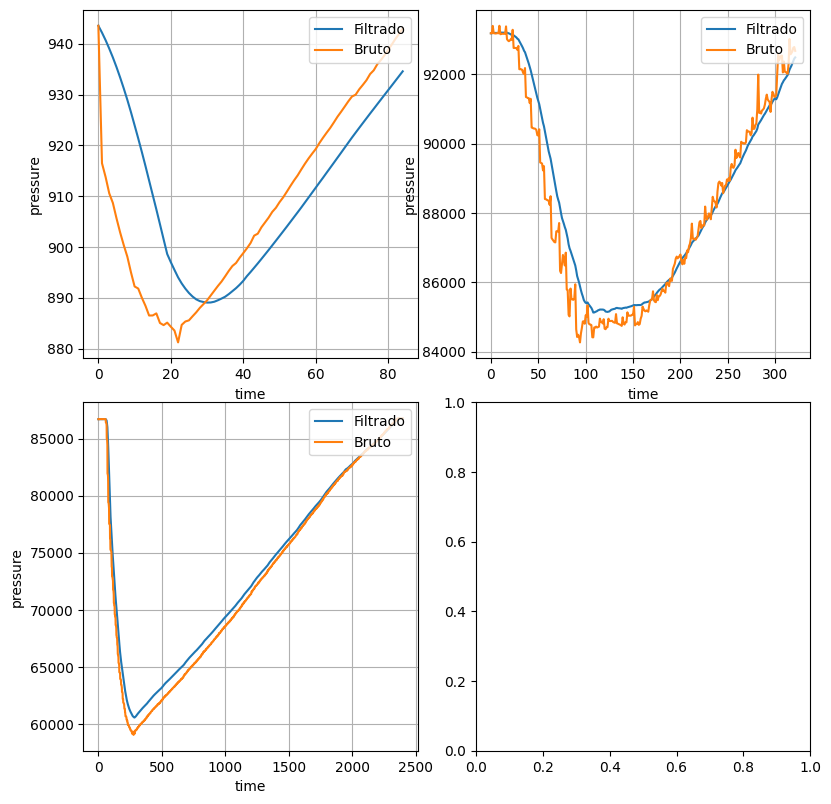

In [9]:
figure, axis = plt.subplots(2, 2, figsize=(8, 8)) 
figure.tight_layout()

# Nyx
y_normal_nyx = pressure_nyx
y_filtrado_nyx = new_pressure_nyx
x_nyx = [x for x in range(len(y_filtrado_nyx))]

axis[0, 0].plot(x_nyx, y_filtrado_nyx, label="Filtrado")
axis[0, 0].plot(x_nyx, y_normal_nyx, label="Bruto")
axis[0, 0].set_xlabel("time")
axis[0, 0].set_ylabel("pressure")
axis[0, 0].legend(loc="upper right")
axis[0, 0].grid()

# Trix
y_normal_trix = pressure_trix
y_filtrado_trix = new_pressure_trix
x_trix = [x for x in range(len(y_filtrado_trix))]

axis[0, 1].plot(x_trix, y_filtrado_trix, label="Filtrado")
axis[0, 1].plot(x_trix, y_normal_trix, label="Bruto")
axis[0, 1].set_xlabel("time")
axis[0, 1].set_ylabel("pressure")
axis[0, 1].legend(loc="upper right")
axis[0, 1].grid()

# Pacífico
y_normal_pacifico = pressure_pacifico
y_filtrado_pacifico = new_pressure_pacifico
x_pacifico = [x for x in range(len(y_filtrado_pacifico))]

axis[1, 0].plot(x_pacifico, y_filtrado_pacifico, label="Filtrado")
axis[1, 0].plot(x_pacifico, y_normal_pacifico, label="Bruto")
axis[1, 0].set_xlabel("time")
axis[1, 0].set_ylabel("pressure")
axis[1, 0].legend(loc="upper right")
axis[1, 0].grid()

plt.show()

# Low-pass filter 1st order

In [10]:
def lowpass_filter(alfa, x_real, x_prev):
    x_prox = alfa*x_prev + (1 - alfa)*x_real
    return x_prox

In [17]:
alfa = 0.8  # Variar esse valor

count = 0
for pressure in pressure_list:
    new_pressure = []
    for i in range(len(pressure)):
        x_real = pressure[i]
        if i == 0:
            x_prev = x_real
        else:
            x_prev = x_prox
        x_prox = lowpass_filter(alfa, x_real, x_prev)
        new_pressure.append(float(x_prox))
    if count == 0:
        new_pressure_nyx = new_pressure
    elif count == 1:
        new_pressure_trix = new_pressure
    elif count == 2:
        new_pressure_pacifico = new_pressure
    count += 1

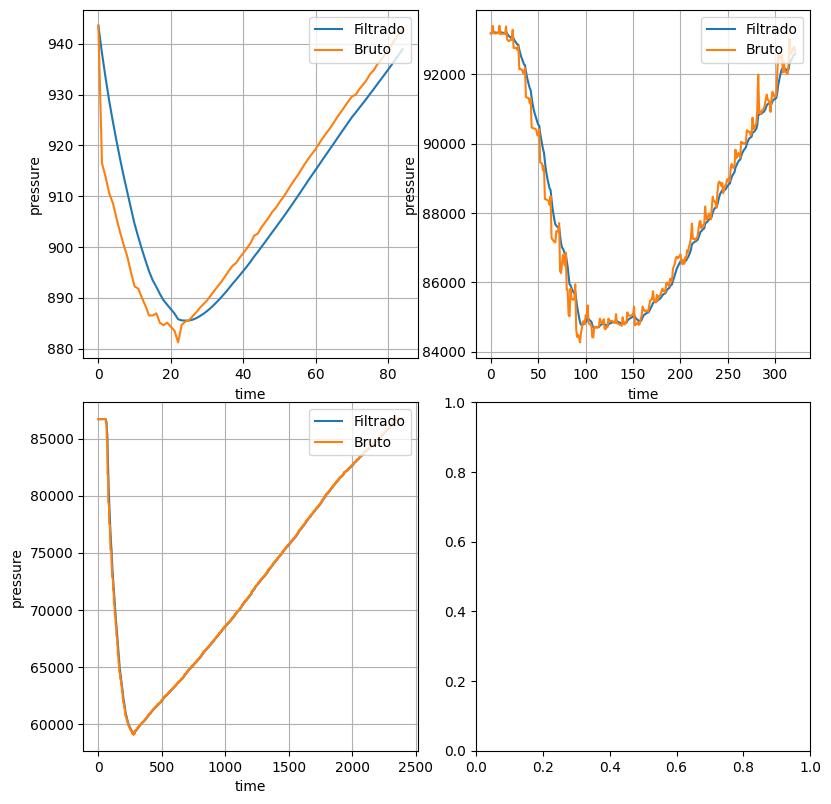

In [18]:
figure, axis = plt.subplots(2, 2, figsize=(8, 8)) 
figure.tight_layout()

# Nyx
y_normal_nyx = pressure_nyx
y_filtrado_nyx = new_pressure_nyx
x_nyx = [x for x in range(len(y_filtrado_nyx))]

axis[0, 0].plot(x_nyx, y_filtrado_nyx, label="Filtrado")
axis[0, 0].plot(x_nyx, y_normal_nyx, label="Bruto")
axis[0, 0].set_xlabel("time")
axis[0, 0].set_ylabel("pressure")
axis[0, 0].legend(loc="upper right")
axis[0, 0].grid()

# Trix
y_normal_trix = pressure_trix
y_filtrado_trix = new_pressure_trix
x_trix = [x for x in range(len(y_filtrado_trix))]

axis[0, 1].plot(x_trix, y_filtrado_trix, label="Filtrado")
axis[0, 1].plot(x_trix, y_normal_trix, label="Bruto")
axis[0, 1].set_xlabel("time")
axis[0, 1].set_ylabel("pressure")
axis[0, 1].legend(loc="upper right")
axis[0, 1].grid()

# Pacífico
y_normal_pacifico = pressure_pacifico
y_filtrado_pacifico = new_pressure_pacifico
x_pacifico = [x for x in range(len(y_filtrado_pacifico))]

axis[1, 0].plot(x_pacifico, y_filtrado_pacifico, label="Filtrado")
axis[1, 0].plot(x_pacifico, y_normal_pacifico, label="Bruto")
axis[1, 0].set_xlabel("time")
axis[1, 0].set_ylabel("pressure")
axis[1, 0].legend(loc="upper right")
axis[1, 0].grid()

plt.show()

# Kalman Filter